In [57]:
from data_pips import BSDS
from forward_models import Convolution
from util import gaussian_kernel

In [58]:
bsds = BSDS("BSDS300/")

Training Pictures found: 200
Evaluation Pictures found: 100


In [59]:
size = 5
sigma = 1
alpha = 1e-2
noise_level = 0.005


In [60]:
h = gaussian_kernel(size=size, sigma=sigma)


In [61]:
model = Convolution((128,128), alpha, h)

In [62]:
sample_image = bsds.load_data()

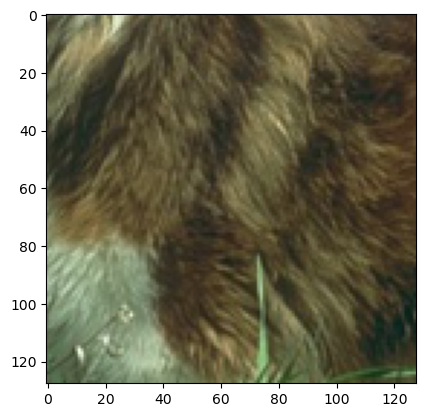

In [63]:
import matplotlib.pyplot as plt

plt.imshow(sample_image)

In [64]:
sample_image.shape

(128, 128, 3)

In [65]:
import tensorflow as tf
x = tf.convert_to_tensor(sample_image, dtype=tf.float32)
if x.shape.rank == 3:
    x = tf.expand_dims(x, 0)  # add batch dim: [1, H, W, 3]
elif x.shape.rank != 4:
    raise ValueError("x must have shape [H,W,3] or [N,H,W,3]")


In [66]:
blurred = model.forward_operator(sample_image)

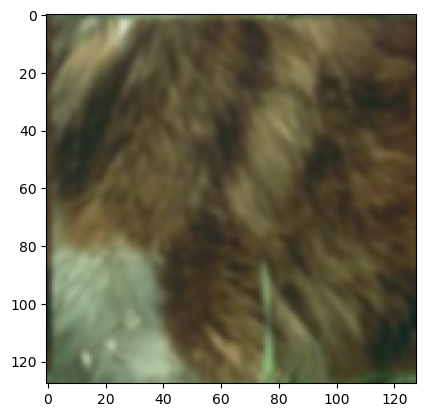

In [67]:
plt.imshow(blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.023474..1.00633].


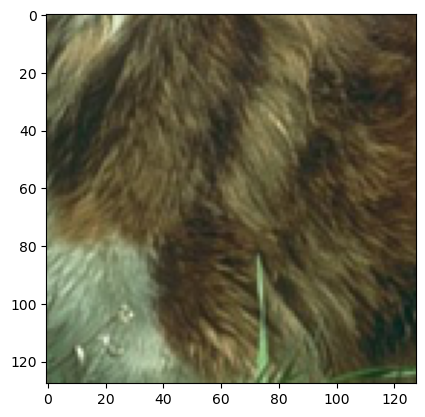

In [68]:
deblurred = model.inverse(blurred)
plt.imshow(deblurred)

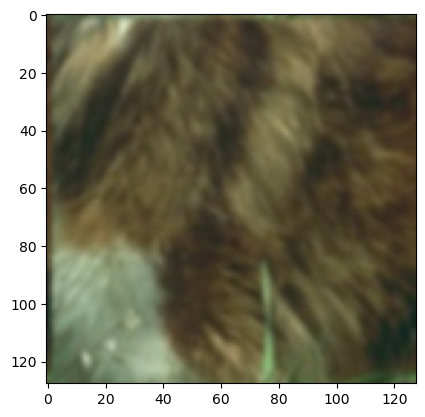

In [69]:
import numpy as np
noisy_blurred =  blurred + noise_level*np.random.normal(size=(128,128,3))

plt.imshow(noisy_blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.536595..1.19969].


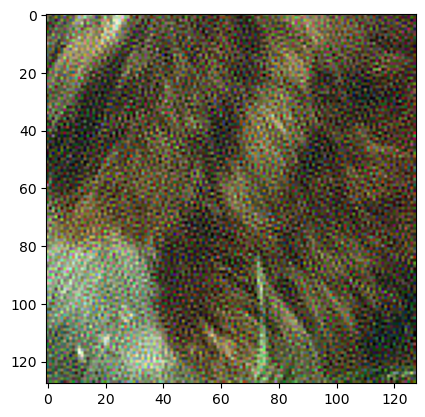

In [70]:
deblurred_noisy = model.inverse(noisy_blurred)
plt.imshow(deblurred_noisy)